Calculations statistics of element distribution by the holes, with normalized sqlite database.

In [12]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt  
import os 
import re

#Scott Halley's geochemistry data in geo3.db file
ls_db_file_name = 'geo3.db' 
#create empty dataframe
df = pd.DataFrame(None)
#create database connection
connect_db = sqlite3.connect(ls_db_file_name)
#lest get a elements_list from table 'elements'
ls_sql0 = "select name from elements"
cur = connect_db.cursor()
cur.execute(ls_sql0)
elements_list = cur.fetchall() # list of elements in elements_list

In [4]:

#Function f_plot_drill_scatter creates jpg scatter diagrams one of 3 types S(D), K(D), S(K)
"""
arguments:
as_element_name - string value like "Ag"
as_type - string value in set one of 3 variants "S(D)", "K(D)", "S(K)" 
as_sub_folder - subfolder in your python catalog with jpg scattergrams
connect_db - database connection object
f_plot_drill_scatter(ls_tmp_element_name,'E(A)',connect_db)
"""
def f_plot_drill_scatter(as_element_name,as_type, as_sub_folder, connect_db):   
    #clear local variables
    ls_tmp_element_name = as_element_name
    ls_main=''
    df = pd.DataFrame(None)
    print(ls_tmp_element_name)
    # adds "main" word to diagram title for main elements  
    if ls_tmp_element_name in ['Al','Ca','Fe','K','Mg','Na','S','Ti','SiO2']:
        ls_main='main '
    # assemble sql query into ls_sql1 to extract data for element distribution by holes 
    ls_sql1 = "select t1.* ,t2.description as desc,t2.mark as mark "+ \
            "from distrib_properties t1 ,assumptions t2 "+ \
            "where t1.assumption_ref = t2.id and t1.element_ref in  "+ \
             " (select t2.id from elements t2 where t2.name= '"+ ls_tmp_element_name+"')"
    # execute ls_Sql to dataframe df
    query = connect_db.execute(ls_sql1)
    cols = [column[0] for column in query.description]
    df = pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
    # preparing diagram titles and axis names
    plt.clf()
    if as_type == 'S(D)':
        ls_chart_name = ls_main + ls_tmp_element_name + ' Skewness vs Standard deviation'
        ls_x_label = 'Standard deviation'  
        ls_y_label = 'Skewness'
        ls_file_name2='-0-S(SD)'
    elif as_type == 'K(D)':
        ls_chart_name = ls_main + ls_tmp_element_name + ' Kurtosis vs Standard deviation'
        ls_x_label = 'Standard deviation'
        ls_y_label = 'Kurtosis'     
        ls_file_name2='-1-K(SD)'      
    elif as_type == 'K(S)':
        ls_chart_name = ls_main + ls_tmp_element_name + ' Kurtosis vs Skewness'
        ls_x_label = 'Skewness'
        ls_y_label = 'Kurtosis'
        ls_file_name2='-2-K(S)'         
    else:#if as_type not in S(D),K(D),S(K) then do nothing and exit
        return 
    # plotting a scatter diagram    

    fig = plt.figure(figsize=(10,5))
    plt.title(ls_chart_name) 
    print (ls_chart_name+ls_tmp_element_name)
    plt.xlabel(ls_x_label)
    plt.ylabel(ls_y_label)
    #plt.axis([-1, 10, -1, 5])
    for i in range(0,len(df)): 
            if df['desc'][i] == 'all':
                ls_tmp_color='red' 
            else:
                ls_tmp_color='blue'
            if as_type == 'S(D)':    
                plt.scatter(df['std_deviation'][i], df['skewness'][i],color = ls_tmp_color) #df['mark'][i]
                plt.text(df['std_deviation'][i], df['skewness'][i]+0.1, df['desc'][i], horizontalalignment='left', size='small', color='black')
            elif as_type == 'K(D)': 
                plt.scatter(df['std_deviation'][i], df['kurtosis'][i],color = ls_tmp_color) #df['mark'][i]
                plt.text(df['std_deviation'][i], df['kurtosis'][i]+0.1, df['desc'][i], horizontalalignment='left', size='small', color='black')
            elif as_type == 'K(S)':                
                plt.scatter(df['skewness'][i], df['kurtosis'][i],color = ls_tmp_color) #df['mark'][i]
                plt.text(df['skewness'][i], df['kurtosis'][i]+0.1, df['desc'][i], horizontalalignment='left', size='small', color='black')
    # save diagram  to jpg file              
    plt.savefig(as_sub_folder+'/'+ls_tmp_element_name+ls_file_name2+'.jpg',bbox_inches='tight', dpi=150)


In [5]:
#specify subfolder where you want to create pictures
ls_sub_folder='pic' #pictures with diagram will be uploaded to this subfolder
if not(os.path.isdir(ls_sub_folder)) :
    os.mkdir(ls_sub_folder)

Ag
Ag Skewness vs Standard deviationAg
Ag
Ag Kurtosis vs Standard deviationAg
Ag
Ag Kurtosis vs SkewnessAg
Al
main Al Skewness vs Standard deviationAl
Al
main Al Kurtosis vs Standard deviationAl
Al
main Al Kurtosis vs SkewnessAl
As
As Skewness vs Standard deviationAs
As
As Kurtosis vs Standard deviationAs
As
As Kurtosis vs SkewnessAs
Ba
Ba Skewness vs Standard deviationBa
Ba
Ba Kurtosis vs Standard deviationBa
Ba
Ba Kurtosis vs SkewnessBa
Be
Be Skewness vs Standard deviationBe
Be
Be Kurtosis vs Standard deviationBe
Be
Be Kurtosis vs SkewnessBe
Bi
Bi Skewness vs Standard deviationBi
Bi
Bi Kurtosis vs Standard deviationBi
Bi
Bi Kurtosis vs SkewnessBi
Ca
main Ca Skewness vs Standard deviationCa
Ca
main Ca Kurtosis vs Standard deviationCa


C:\Users\b_malahov\AppData\Local\Temp\ipykernel_5700\1344417697.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,5))


Ca
main Ca Kurtosis vs SkewnessCa
Cd
Cd Skewness vs Standard deviationCd
Cd
Cd Kurtosis vs Standard deviationCd
Cd
Cd Kurtosis vs SkewnessCd
Ce
Ce Skewness vs Standard deviationCe
Ce
Ce Kurtosis vs Standard deviationCe
Ce
Ce Kurtosis vs SkewnessCe
Co
Co Skewness vs Standard deviationCo
Co
Co Kurtosis vs Standard deviationCo
Co
Co Kurtosis vs SkewnessCo
Cr
Cr Skewness vs Standard deviationCr
Cr
Cr Kurtosis vs Standard deviationCr
Cr
Cr Kurtosis vs SkewnessCr
Cs
Cs Skewness vs Standard deviationCs
Cs
Cs Kurtosis vs Standard deviationCs
Cs
Cs Kurtosis vs SkewnessCs
Fe
main Fe Skewness vs Standard deviationFe
Fe
main Fe Kurtosis vs Standard deviationFe
Fe
main Fe Kurtosis vs SkewnessFe
Ga
Ga Skewness vs Standard deviationGa
Ga
Ga Kurtosis vs Standard deviationGa
Ga
Ga Kurtosis vs SkewnessGa
Ge
Ge Skewness vs Standard deviationGe
Ge
Ge Kurtosis vs Standard deviationGe
Ge
Ge Kurtosis vs SkewnessGe
Hf
Hf Skewness vs Standard deviationHf
Hf
Hf Kurtosis vs Standard deviationHf
Hf
Hf Kurtosis vs

<Figure size 432x288 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

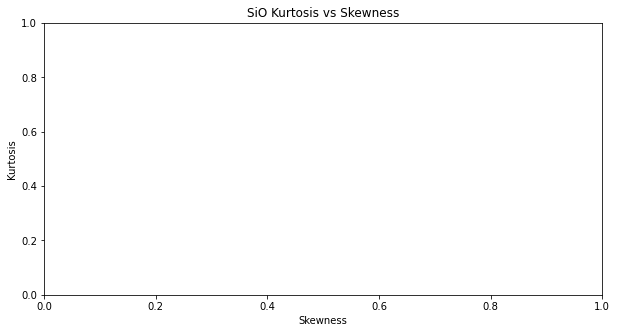

In [6]:
#generate 144 diagrams in pic folder ls_sub_folder
for i in range(0, len(elements_list)):
#for i in range(0, 1):    
    #this regexp clears elements_list from extra characters
    reg = re.compile('[^a-zA-Z ]')
    ls_tmp_element_name=reg.sub('', str(elements_list[i]))   
    #create 3 diagram files to each element 
    f_plot_drill_scatter(ls_tmp_element_name,'S(D)',ls_sub_folder,connect_db)
    f_plot_drill_scatter(ls_tmp_element_name,'K(D)',ls_sub_folder,connect_db)
    f_plot_drill_scatter(ls_tmp_element_name,'K(S)',ls_sub_folder,connect_db)        

In [7]:
"Let's analyse 144 scatter diagrams in subfolder ../"+ls_sub_folder

"Let's analyse 144 scatter diagrams in subfolder ../pic"

Visual anomalies in raw data distributions by drill holes.
What to do:
1.Check Ag data in DDH011
2.Interesting Berillium anomaly in DDH004 hole l Be-0-S(SD).jpg
3.Check Cd data in DDH001 vs other
4.Check Co data in DDH008 vs other
5.Check Cr data in DDH009 vs other
6.Check Ge data in DDH010 vs other
7.Check Hf data in DDH013 vs other
8.Check In data in DDH011 vs other
9.Check La data in DDH011 vs other
10.Check Li data in DDH010 vs other
11.Check Mg data in DDH010 vs other
12.Check Mo data in DDH008 vs other
13.Check Ni data in DDH010 vs other
14.Check Rb data in DDH008 vs other
15.Check Re data in DDH013 suspition to outlier
16.Check Sb data in DDH008 vs other
17.Check Se data in DDH008 vs other
18.Check Sn data in DDH008 vs other
19.Check Sr data in DDH008 vs other
20.Check Ta data in DDH009 suspition to outlier
21.Check Te data in DDH013,DDH014 suspition to outlier
22.Check main Ti data in DDH003,DDH007 not sure, suspition to outlier
23.Check U data in DDH013 vs other
24.Check V data in DDH007 vs other
25.Check W data in DDH007 vs other
26.Check Y data in DDH003
27.Check Zn data in DDH001
28.Check Zr data in DDH013

So the data from 1,7,8,9,10,11,13 drill holes contains some strange.
The highest anomaly number 7 is in DDH008.
The next step is to label the data in the db, by exclusion_ref = 1 - outlier 2-below the LOD and recalculate scatter diagramms again



In [13]:
ls_sql1='select t1.id, t1.mant,t1.expo,t2.name from data t1, elements t2, samples t3, holes t4 '+ \
'where t1.element_ref=t2.id and t1.sample_ref=t3.id and t3.hole_ref=t4.id  '+ \
'and t4.name="DDH004"   /*hole name*/ '+ \
'and t2.name="Be"  /*element number*/ '+ \
'order by t1.mant desc LIMIT 5;'
cur.execute(ls_sql1)
elements_list = cur.fetchall()
elements_list

[(16126, 9.13, -6, 'Be'),
 (16155, 2.68, -6, 'Be'),
 (16125, 2.58, -6, 'Be'),
 (16128, 2.46, -6, 'Be'),
 (16164, 2.45, -6, 'Be')]

The value with id=16126 might be marked as exclusion_ref = 1 - outlier